In [2]:
import nltk

In [3]:
# load a corpus:
corpus = nltk.corpus.gutenberg

In [4]:
print([fn for fn in dir(corpus) if "_" not in fn])

['subdir']


In [5]:
help(corpus.fileids)

Help on method fileids in module nltk.corpus.reader.api:

fileids() method of nltk.corpus.reader.plaintext.PlaintextCorpusReader instance
    Return a list of file identifiers for the fileids that make up
    this corpus.



In [6]:
print(corpus.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [7]:
emma = corpus.sents("austen-emma.txt")

In [8]:
len(emma)

7752

In [9]:
print(emma[20])

['A', 'large', 'debt', 'of', 'gratitude', 'was', 'owing', 'here', ';', 'but', 'the', 'intercourse', 'of', 'the', 'last', 'seven', 'years', ',', 'the', 'equal', 'footing', 'and', 'perfect', 'unreserve', 'which', 'had', 'soon', 'followed', 'Isabella', "'", 's', 'marriage', ',', 'on', 'their', 'being', 'left', 'to', 'each', 'other', ',', 'was', 'yet', 'a', 'dearer', ',', 'tenderer', 'recollection', '.']


In [10]:
emma_words = corpus.words("austen-emma.txt")
print(list(emma_words[0:200]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied'

# In the context of a smart keyboard
Would the novel "Emma" be considered a good fit for the smart keyboard for *you*? Why or why not? What other technical issues do you spot with the text above? Feel free to explore more of teh text as well.

**TODO: your answer here**

# Inspecting the corpus:

In [11]:
# let's explore the contents of the novel:
print(f"""
    {len(emma_words)} words in the novel.
    {len(set(emma_words))} unique words in the novel.
    {len(emma)} sentences in the novel.
    {round(len(emma_words) / len(emma), 2)} average sentence length.
    {round(sum([len(w) for w in emma_words]) / len(emma_words), 2)} average word length.
""")


    192427 words in the novel.
    7811 unique words in the novel.
    7752 sentences in the novel.
    24.82 average sentence length.
    3.76 average word length.



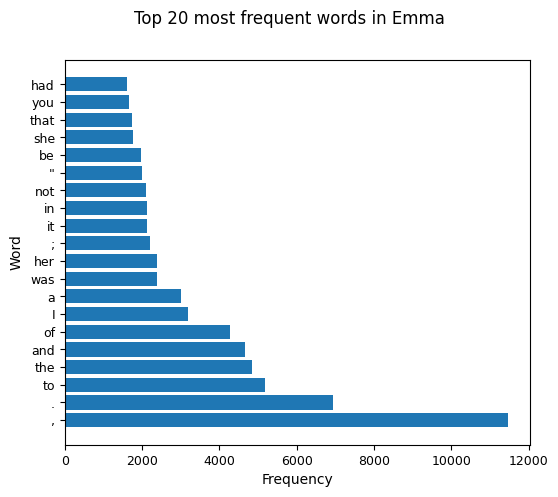

In [12]:
# now let's look at some more useful features:
# such as word frequency, collocations, concordance
import matplotlib.pyplot as plt

def plot_top_n(words, N=20):
    word_freq = nltk.FreqDist(words)
    top_n = word_freq.most_common(N)
    fig, ax = plt.subplots(figsize=(6, N/4))

    fig.suptitle(f"Top {N} most frequent words in Emma")
    words, values = zip(*top_n)
    ax.barh(words, values)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Word")
    ax.tick_params(axis="both", labelsize=9)
    plt.show()

plot_top_n(emma_words)

In [13]:
# use nltks collocation finder to find tfidf
from nltk.text import TextCollection

nltk_textcollection = TextCollection(emma)

In [14]:
sample_sent = emma[100]
print(sample_sent)

['You', 'do', 'not', 'think', 'I', 'could', 'mean', '_you_', ',', 'or', 'suppose', 'Mr', '.', 'Knightley', 'to', 'mean', '_you_', '.']


In [15]:
s = "I'm gonna go to the mall today. I'm gonna get some new shoes, a super-fancy new shirt, etc., etc., etc."

unigrams = nltk.word_tokenize(s)
bigrams = list(nltk.bigrams(unigrams))
trigrams = list(nltk.trigrams(unigrams))
print(f"""
      Unigrams: {unigrams}
      Bigrams: {bigrams}
      Tri-grams: {trigrams}
      """)


      Unigrams: ['I', "'m", 'gon', 'na', 'go', 'to', 'the', 'mall', 'today', '.', 'I', "'m", 'gon', 'na', 'get', 'some', 'new', 'shoes', ',', 'a', 'super-fancy', 'new', 'shirt', ',', 'etc.', ',', 'etc.', ',', 'etc', '.']
      Bigrams: [('I', "'m"), ("'m", 'gon'), ('gon', 'na'), ('na', 'go'), ('go', 'to'), ('to', 'the'), ('the', 'mall'), ('mall', 'today'), ('today', '.'), ('.', 'I'), ('I', "'m"), ("'m", 'gon'), ('gon', 'na'), ('na', 'get'), ('get', 'some'), ('some', 'new'), ('new', 'shoes'), ('shoes', ','), (',', 'a'), ('a', 'super-fancy'), ('super-fancy', 'new'), ('new', 'shirt'), ('shirt', ','), (',', 'etc.'), ('etc.', ','), (',', 'etc.'), ('etc.', ','), (',', 'etc'), ('etc', '.')]
      Tri-grams: [('I', "'m", 'gon'), ("'m", 'gon', 'na'), ('gon', 'na', 'go'), ('na', 'go', 'to'), ('go', 'to', 'the'), ('to', 'the', 'mall'), ('the', 'mall', 'today'), ('mall', 'today', '.'), ('today', '.', 'I'), ('.', 'I', "'m"), ('I', "'m", 'gon'), ("'m", 'gon', 'na'), ('gon', 'na', 'get'), ('na', 'ge

In [16]:
unseen_sent = "I am a sentence that is not in the corpus"
# produce all tf_idf scores for the given sentence
tf_vector = []
for word in unseen_sent.split():
    tf_vector.append(nltk_textcollection.tf_idf(word, unseen_sent))
tf_vector

[0.031668862453473466,
 0.07354963172805294,
 0.09309530286708118,
 0.18461979981587104,
 0.04236088892564737,
 0.04944313013185211,
 0.03603747461977602,
 0.038153437046225466,
 0.025751483669045665,
 0.0]

# From the word frequencies...
Do you spot any potential issues when building a smart keyboard from existing data?

In [17]:
# let's load another corpus with some more interesting data:
from nltk.corpus import brown
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [18]:
# now this could be used to build different kinds of keyboard predictors, which could be interesting to experiment with!
# let's select two opposing categories:
humor = brown.sents(categories="humor")
humor_words = brown.words(categories="humor")
scifi = brown.sents(categories="science_fiction")
scifi_words = brown.words(categories="science_fiction")

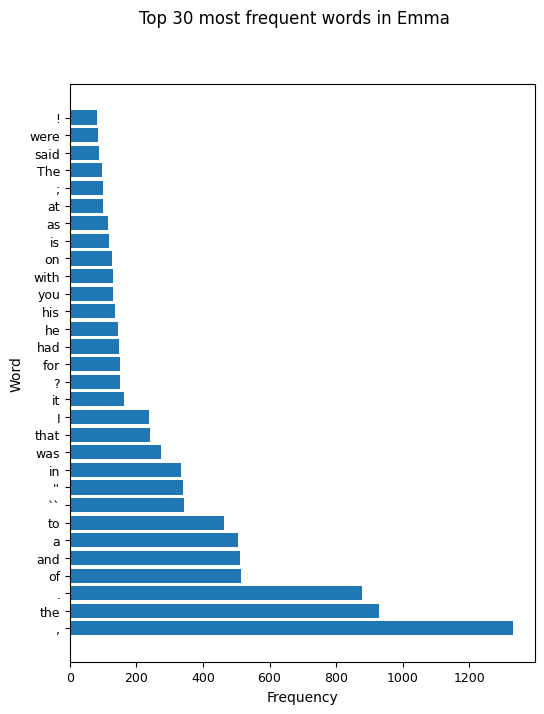

In [19]:
plot_top_n(humor_words, N=30)

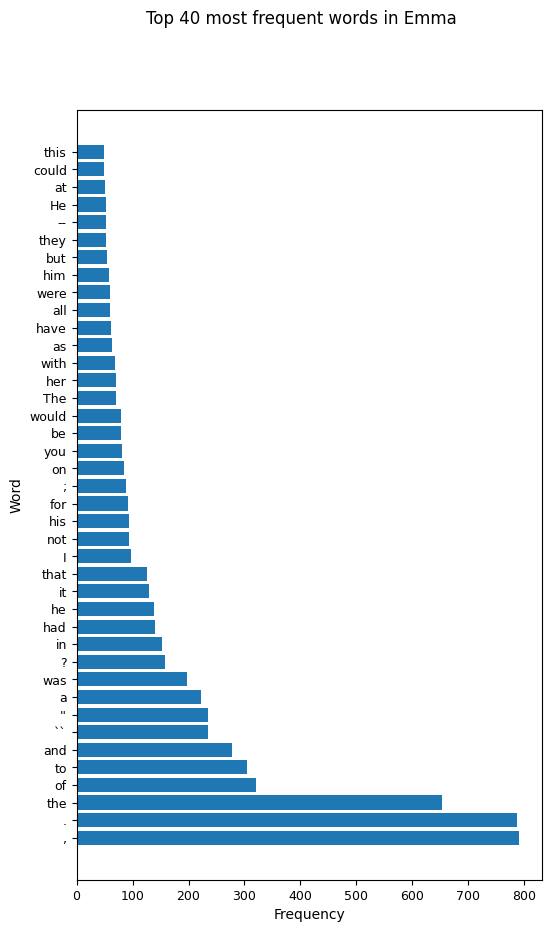

In [20]:
plot_top_n(scifi_words, N=40)

# Hmm.
The differences aren't exactly what we may have expected. Let's look at more categories.

### a)
From the output, we see that the top words are largely similar, and contain common words like "the" and "of". Additionally, punctuations take up a majority of the "words"/tokens

In [21]:
# most common words
def most_common(words, n=5):
    fdist = nltk.FreqDist(words)
    return fdist.most_common(n)

categories = ["science_fiction", "humor", "government", "mystery", "news"]
for c in categories:
    words = brown.words(categories=c)
    print("category: {}".format(c))
    print(most_common(words))

category: science_fiction
[(',', 791), ('.', 786), ('the', 652), ('of', 321), ('to', 305)]
category: humor
[(',', 1331), ('the', 930), ('.', 877), ('of', 515), ('and', 512)]
category: government
[('the', 4143), (',', 3405), ('of', 3031), ('.', 2493), ('and', 1923)]
category: mystery
[('.', 3326), (',', 2805), ('the', 2573), ('to', 1284), ('and', 1215)]
category: news
[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146)]


### b)
With stopwords removed, we're left with only symbols. A potential improvement on this is to check the length of the word, e.g. to filter out all words below 2 characters. Additionally, we could make some regex filter to remove symbols entirely. However, we want to be careful here as apostrophes, hyphens, commas, etc, may provide value.

In [22]:
stop_words = nltk.corpus.stopwords.words('english')

for c in categories:
    words = brown.words(categories=c)
    words = [w for w in words if w.lower() not in stop_words]
    print("category: {}".format(c))
    print(most_common(words))

category: science_fiction
[(',', 791), ('.', 786), ('``', 235), ("''", 235), ('?', 158)]
category: humor
[(',', 1331), ('.', 877), ('``', 343), ("''", 340), ('?', 152)]
category: government
[(',', 3405), ('.', 2493), (';', 444), (')', 345), ('(', 342)]
category: mystery
[('.', 3326), (',', 2805), ('``', 740), ("''", 738), ('?', 664)]
category: news
[(',', 5188), ('.', 4030), ('``', 732), ("''", 702), ('said', 402)]


In [23]:
def valid_word(word):
    not_stop = word.lower() not in stop_words
    valid_length = len(word) > 2
    return not_stop and valid_length

def just_words(common_words):
    return [w[0] for w in common_words]

for c in categories:
    words = brown.words(categories=c)
    words = [w.lower() for w in words if valid_word(w)]
    print("category: {}".format(c))
    print(just_words(most_common(words, n=20)))

category: science_fiction
['would', 'could', 'said', 'one', 'time', 'ekstrohm', 'helva', 'mercer', 'long', 'like', 'know', 'people', 'hal', "b'dikkat", 'mike', 'ship', 'back', 'man', 'jack', 'first']
category: humor
['said', 'one', 'would', 'time', 'even', 'like', 'mr.', 'could', 'way', 'things', 'two', 'get', 'little', 'mother', 'arlene', 'man', 'made', 'years', 'day', 'never']
category: government
['state', 'year', 'states', 'may', 'united', 'new', 'development', 'one', 'would', 'made', 'business', 'government', 'years', 'time', 'must', 'fiscal', 'shall', 'general', 'tax', 'also']
category: mystery
['said', 'would', 'one', 'back', 'could', 'like', 'man', 'get', 'two', 'know', 'time', 'got', 'door', 'see', 'went', 'around', 'still', 'right', 'car', 'even']
category: news
['said', 'mrs.', 'would', 'new', 'one', 'last', 'two', 'mr.', 'first', 'state', 'year', 'president', 'home', 'also', 'made', 'time', 'years', 'three', 'house', 'week']


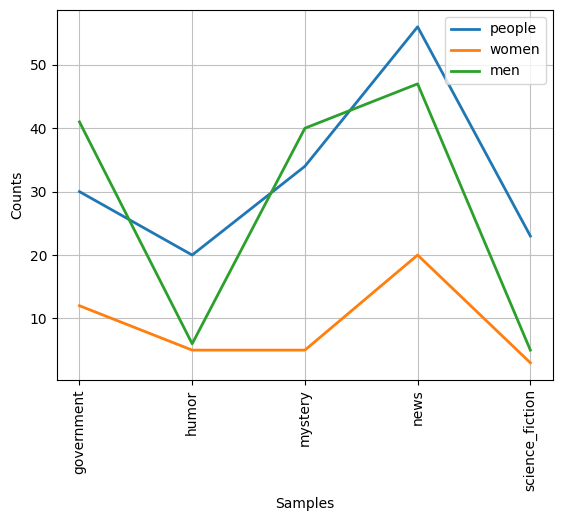

In [24]:
cfd = nltk.ConditionalFreqDist(
    (search_word, c)
    for c in categories
    for w in brown.words(categories=c)
    for search_word in ["men", "women", "people"]
    if w.lower() == search_word
)
cfd.plot();

In [25]:
def get_concordance(corpus, word):
    if type(corpus) == str:
        corpus = nltk.corpus.brown.words(categories=corpus)
    return nltk.Text(corpus).concordance(word)

get_concordance("lore", "popular")

Displaying 6 of 6 matches:
Yes sir ! ! Conferences become very popular . When a plan burst its seams , has
ve that their lieutenant , the most popular officer in the regiment , was dead 
 long ago `` Denver Mud '' was most popular . Chiggers were a common pest along
hn Vinnicum Morse was the immediate popular suspect . His sudden unannounced ap
 to the nineteenth century it was a popular practice to flood the piazza in the
 Lumumba had -- has -- captured the popular imagination there . I was curious t


In [26]:
get_concordance("news", "popular")

Displaying 6 of 6 matches:
or are tripping over their feet for popular slogans to win the primary . But we
ns are corrupt , selfish and beyond popular control . These voters view the pol
dynamite Italian flicker , opens at popular prices at the Loop theater Nov. 2 .
 Those qualities make Esther Marr a popular asset at the Salvation Army's Socia
 Days . Ginghams and calico will be popular dress for the women . The men will 
apstick . Kings 4 , have rated as a popular act in Vegas and Western nightclubs


In [27]:
def get_similar(corpus, word):
    return nltk.Text(corpus).similar(word)

get_similar(scifi_words, "where")

he there what it


In [28]:
get_similar(humor_words, "where")

that to in attempt what worried called walk only announce leaving try
belong drunk remember refer begin intrigued doris happen
